In [11]:
import pandas as pd
import os
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
os.chdir("D:\Yelp data")

In [12]:
yelp_business=pd.read_json("business.json",lines=True)

In [13]:
Ontario_restaurant=yelp_business[yelp_business.categories.str.contains("Restaurant")==1][yelp_business["state"]=="ON"]
Ontario_restaurant.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
29,1170 Queen Street W,"{'WiFi': 'u'no'', 'BikeParking': 'True', 'Rest...",NDuUMJfrWk52RA-H-OtrpA,"Juice Bars & Smoothies, Food, Restaurants, Fas...",Toronto,"{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",1,43.642889,-79.425429,Bolt Fresh Bar,M6J 1J5,57,3.0,ON
32,1051 Bloor Street W,"{'BusinessParking': '{'garage': False, 'street...",SP_YXIEwkFPPl_9anCYmpQ,"Restaurants, Nightlife, Breakfast & Brunch, Ve...",Toronto,"{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0...",0,43.660494,-79.432099,The Steady Cafe & Bar,M6H 1M4,29,3.5,ON
50,582 College Street,"{'Alcohol': 'u'full_bar'', 'Caters': 'False', ...",mlHC2XcU9Bows6cnYEmRgg,"Restaurants, Breakfast & Brunch, Bars, Modern ...",Toronto,"{'Thursday': '18:0-2:0', 'Friday': '18:0-2:0',...",0,43.655420,-79.413352,Mad Crush Wine Bar,M6G 1B3,9,4.0,ON
61,"17205 Leslie Street, Unit 2","{'RestaurantsAttire': ''casual'', 'Restaurants...",6l00a9Gkxkcp_y-GPjYBiw,"Fish & Chips, Restaurants",Newmarket,None,1,44.058765,-79.429115,J's Fish & Chips,L3Y 8Y8,12,4.5,ON


In [14]:
Ontario_restaurant.describe()

,is_open,latitude,longitude,review_count,stars
count,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000
mean,0.708401,43.718635,-79.429537,37.576996,3.372674
std,0.454514,0.105536,0.150760,67.842949,0.765367
min,0.000000,43.450082,-79.947053,3.000000,1.000000
25%,0.000000,43.650561,-79.489337,6.000000,3.000000
50%,1.000000,43.680204,-79.403949,15.000000,3.500000
75%,1.000000,43.787950,-79.359418,41.000000,4.000000
max,1.000000,44.147909,-78.900077,2121.000000,5.000000


In [15]:
Ontario_restaurant=Ontario_restaurant[["business_id","categories","city","name","postal_code","review_count","stars"]]
Ontario_restaurant=Ontario_restaurant.set_index("business_id")
Ontario_restaurant.head()

,categories,city,name,postal_code,review_count,stars
business_id,,,,,,
QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,Emerald Chinese Restaurant,L5R 3E7,128,2.5
NDuUMJfrWk52RA-H-OtrpA,"Juice Bars & Smoothies, Food, Restaurants, Fas...",Toronto,Bolt Fresh Bar,M6J 1J5,57,3.0
SP_YXIEwkFPPl_9anCYmpQ,"Restaurants, Nightlife, Breakfast & Brunch, Ve...",Toronto,The Steady Cafe & Bar,M6H 1M4,29,3.5
mlHC2XcU9Bows6cnYEmRgg,"Restaurants, Breakfast & Brunch, Bars, Modern ...",Toronto,Mad Crush Wine Bar,M6G 1B3,9,4.0
6l00a9Gkxkcp_y-GPjYBiw,"Fish & Chips, Restaurants",Newmarket,J's Fish & Chips,L3Y 8Y8,12,4.5


In [17]:
review=pd.read_csv("yelp_review.csv")
review=head()

In [22]:
user=pd.read_csv("yelp_user.csv")
user.head()

In [24]:
review=review[["review_id","user_id","business_id","stars","useful","funny","cool"]]
user=user[["user_id","review_count","useful","funny","cool","fans"]]

In [27]:
final_dataset=review.join(Ontario_restaurant.set_index("business_id"),how="inner",on="business_id",lsuffix="_review",rsuffix="_business")


In [28]:
final_dataset=final_dataset.join(user.set_index("user_id"),how="inner",on="user_id",lsuffix="_final",rsuffix="_user")

In [3]:
final_dataset.to_csv("yelp_train.csv")

NameError: name 'final_dataset' is not defined

In [16]:
final_dataset=pd.read_csv("yelp_train.csv")

In [12]:
final_dataset.head()

,Unnamed: 0,review_id,user_id,business_id,stars_review,useful_final,funny_final,cool_final,categories,city,name,postal_code,review_count_final,stars_business,review_count_user,useful_user,funny_user,cool_user,fans
0,6,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,0,0,2,"Restaurants, Vietnamese, Thai",Toronto,Little Coxwell Vietnamese & Thai Cuisine,M4C 3G5,115,4.0,359,79,7,22,8
1,7,8UIishPUD92hXtScSga_gw,u0LXt3Uea_GidxRW1xcsfg,gkCorLgPyQLsptTHalL61g,4,1,0,0,"Food, Restaurants, Coffee & Tea",Toronto,Broadview Espresso,M4K 2P9,65,4.0,359,79,7,22,8
2,8,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,1,0,0,"Restaurants, Poutineries, Fast Food",Toronto,Poutini's House of Poutine,M6J 1H9,268,3.5,359,79,7,22,8
3,10,PIsUSmvaUWB00qv5KTF1xA,u0LXt3Uea_GidxRW1xcsfg,z8oIoCT1cXz7gZP5GeU5OA,4,1,0,0,"Canadian (New), Bars, American (New), Chinese,...",Toronto,Milliken Bar & Restaurant,M1S 3T6,36,3.5,359,79,7,22,8
4,11,PdZ_uFjbbkjtm3SCY_KrZw,u0LXt3Uea_GidxRW1xcsfg,XWTPNfskXoUL-Lf32wSk0Q,3,5,0,1,"Restaurants, Diners, Breakfast & Brunch",Toronto,Rosedale Diner,M4W 2L9,80,3.5,359,79,7,22,8


In [16]:
final_dataset.groupby("stars_review").count()["user_id"].plot(kind="bar")
final_dataset["stars_review"].mean()

3.5473913707022477

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000276AEB106A0>]],
      dtype=object)

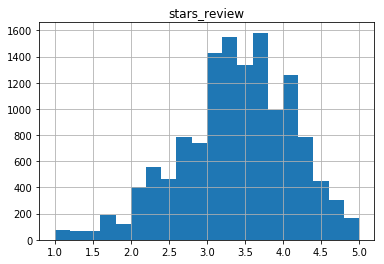

In [32]:
final_dataset.groupby("business_id").agg({"stars_review":"mean"}).hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002878C0BF1D0>]],
      dtype=object)

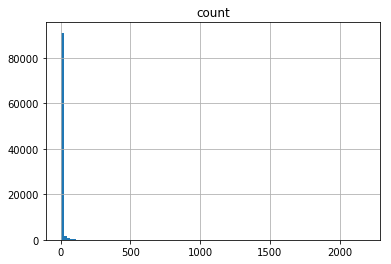

In [52]:
review_count=pd.DataFrame(final_dataset.groupby("user_id",as_index=False).size(),columns=["count"]).sort_values("count",ascending=False)

pd.DataFrame.hist(review_count,bins=100)


In [17]:
Ontario_restaurant_mat=final_dataset.pivot(index="business_id",columns="user_id",values="stars_review").fillna(0)

In [21]:
Ontario_restaurant_mat.head()

user_id,--56y1InAvNoQOD6YYrhVQ,--6_wnx2sD1rqOQAQH96wg,--7NmCl2zZVnGdzVMd_3HQ,--7gjElmOrthETJ8XqzMBw,--Br-QsbO9ad5GbZxVGxaw,--BumyUHiO_7YsHurb9Hkw,--DKDJlRHfsvufdGSk_Sdw,--EVSb3jbKVL3WJ5NUCuCA,--KQJPdrU0Md97DiOliDzw,--Qh8yKWAvIP4V4K8ZPfHA,...,zzaq5Fn1U2Feut3dGxidNg,zzct9KyC476L0uVUcWNq_A,zzdORsDL40oUJHArofuYVw,zzltQbbtriSWWdNINMzJUw,zzo--VpSQh8PpsGVeMC1dQ,zzoNLUFml9D-FFSkDoGg2g,zzpbqXAEAsoSToIDerh15g,zztkCqqgR6VntYbqio4UTQ,zzwTJAgONYCTeJia4te47g,zzyMMeUZzKAy7KQhM7lU2w
business_id,,,,,,,,,,,,,,,,,,,,,
--6MefnULPED_I942VcFNA,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,...,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391
--DaPTJW3-tB1vP-PfdTEg,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,...,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391
--SrzpvFLwP_YFwB_Cetow,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,...,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391
-0CTrPQNiSyClxhdO4HSDQ,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,...,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391
-0DET7VdEQOJVJ_v6klEug,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,...,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391
-0KMvRFwDWdVBeTpT11iHw,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,...,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391
-0NhdsDJsdarxyDPR523ZQ,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.000000,...,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391
-0NrB58jqKqJfuUCDupcsw,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,...,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391
-0RRiWDtfnS16AKCtfvBZg,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,...,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391,3.547391


In [39]:
def knn_model():
    model=NearestNeighbors(metric="cosine",algorithm="brute",n_neighbors=20,n_jobs=-1)
    return model
model=knn_model()

In [53]:
def knn_recommandation(data,fav_restaurant,n_recommendations=10,weighted=False):
    """
    using yelp data to recommand restaurant
    
    knn_approach

    Parameters
    ----------
    model_knn: sklearn model, knn model

    data: yelp restaurant data converted to matrix:
          row as business identifier
          column as user identifier

    input: favorite restaurant

    n_recommendations: int, top n recommendations
    """
    if 'model' in globals():
        global model
    else:
        model=knn_model()
    # fit
    model.fit(data)
    print("Find restaurants similar to {} based on user input".format(fav_restaurant))
    # inference
    print('Here are the top ten recommandations:')
    print('......\n')
    business_id=Ontario_restaurant[Ontario_restaurant["name"]==fav_restaurant].index[0]
    distances, indices = model.kneighbors(data.filter(like=business_id,axis='index'), n_neighbors=n_recommendations+1)
    # get list of raw idx of recommendations
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # print recommendations
    print('Recommendations for {}:'.format(my_favorite))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1,list(Ontario_restaurant["name"][Ontario_restaurant.index==Ontario_restaurant_mat.index[idx]])[0], dist))

"Amigo's Latin Flavour"

In [54]:
my_favorite = 'Emerald Chinese Restaurant'

knn_recommandation(
    data=Ontario_restaurant_mat,
    fav_restaurant=my_favorite)

Find restaurants similar to Emerald Chinese Restaurant based on user input
Here are the top ten recommandations:
......

Recommendations for Emerald Chinese Restaurant:
1: Kobe Sushi, with distance of 0.8729435047925027
2: Wonton Chai Noodle, with distance of 0.8717288246806103
3: Chako, with distance of 0.8693951111786435
4: Congee Dynasty, with distance of 0.8658084838350306
5: Dynasty BBQ, with distance of 0.861539455352046
6: McDonald's, with distance of 0.8548495321630935
7: Wild Wing, with distance of 0.854550339648705
8: Blue Lagoon Seafood Master, with distance of 0.8544684454549096
9: Viet Thai Restaurant, with distance of 0.8378466819037798
10: Happy Jade Seafood Chinese Restaurant, with distance of 0.7963704755081871


In [55]:
my_favorite = "J's Fish & Chips"


knn_recommandation(
    data=Ontario_restaurant_mat,
    fav_restaurant=my_favorite)

Find restaurants similar to J's Fish & Chips based on user input
Here are the top ten recommandations:
......

Recommendations for J's Fish & Chips:
1: Taza Xpress, with distance of 0.9176311421402781
2: Quesada Burritos and Tacos, with distance of 0.9038392772773323
3: Twisted Fork, with distance of 0.896251268968906
4: Yamato Sushi, with distance of 0.8955883310348774
5: St. Louis Bar & Grill, with distance of 0.8916467512822909
6: Otaru Sushi, with distance of 0.8879336370638948
7: Bakery Garden, with distance of 0.8687116746261058
8: Sunset Grill, with distance of 0.8267602678311907
9: Mrs. Greek Souvlaki Express, with distance of 0.7920633893787208
10: The Prince Albert Pub, with distance of 0.7846347538730261
